<a href="https://colab.research.google.com/github/krishnamittal01/data-science/blob/main/MULTIPLE_LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_index=pd.read_csv("/content/economic_index.csv")

Drop the unnecessary column

In [4]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [6]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [7]:
##check the null valuue
df_index.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


In [8]:
## vizualization

import seaborn as sns

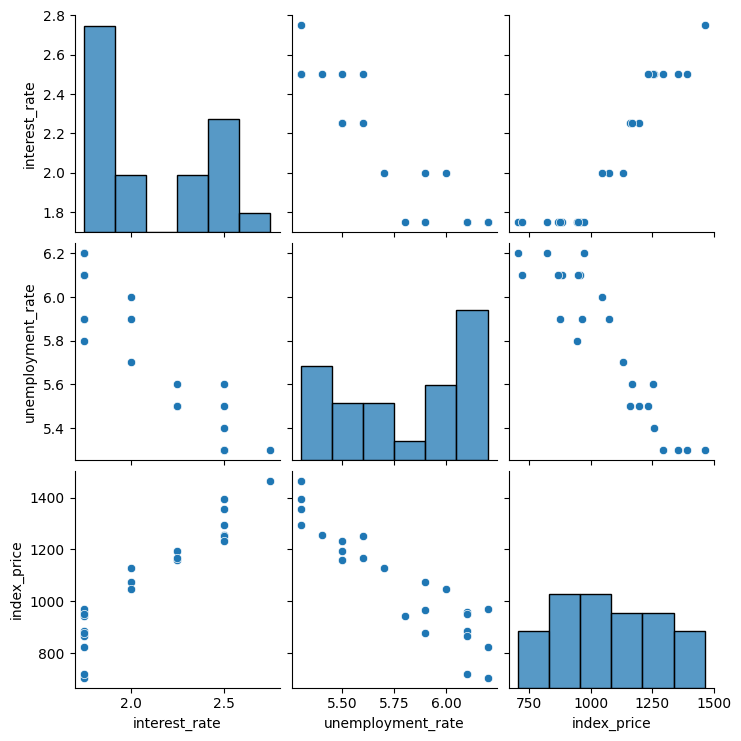

In [9]:
sns.pairplot(df_index)

In [10]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

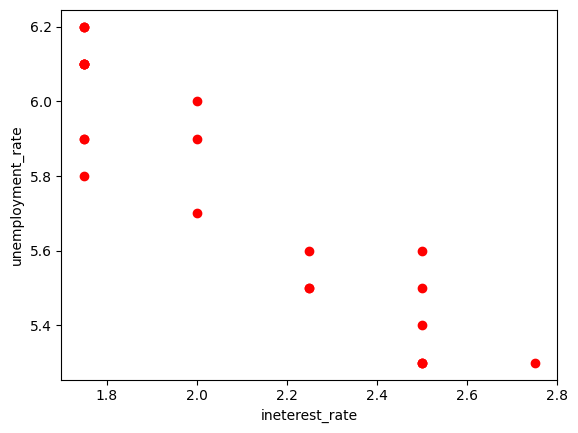

In [11]:
### vizualise the data points more closely
plt.scatter(df_index['interest_rate'],df_index["unemployment_rate"],color='red')
plt.xlabel('ineterest_rate')
plt.ylabel('unemployment_rate')

In [18]:
### independent and dependent feature

X=df_index.iloc[:,0:2]
Y=df_index.iloc[:,2:]

In [23]:
X

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [24]:
Y

,index_price
0,1464
1,1394
2,1357
3,1293
4,1256
5,1254
6,1234
7,1195
8,1159
9,1167


<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

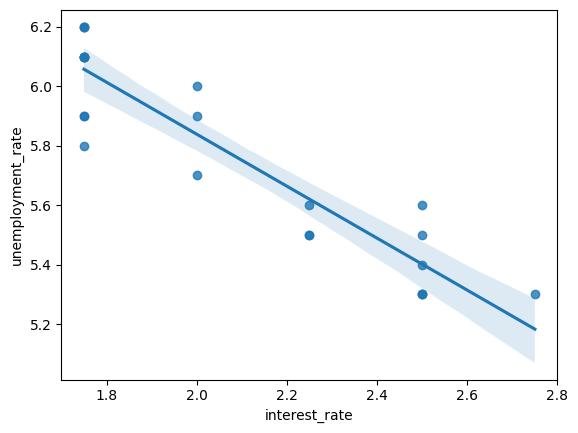

In [22]:
import seaborn as sns
sns.regplot(x="interest_rate",y="unemployment_rate",data=df_index)

<Axes: xlabel='interest_rate', ylabel='index_price'>

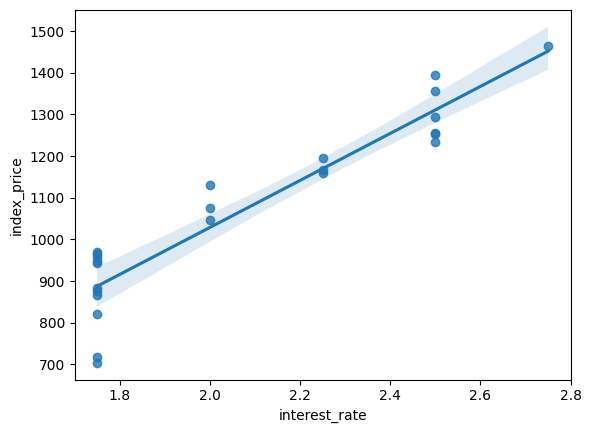

In [27]:
sns.regplot(x='interest_rate',y='index_price',data=df_index)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler=StandardScaler()

In [30]:
scaler.fit_transform(X_train)

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [31]:
X_test=scaler.transform(X_test)

In [32]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [33]:
regression.fit(X_train,Y_train)


LinearRegression()

In [35]:
from sklearn.model_selection import cross_val_score    ##cv=5 means cross validation
val_score=cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',cv=3)

In [36]:
val_score ## from here i'll get the three mse values

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [37]:
np.mean(val_score)

np.float64(-5914.828180162421)

**CROSS VAL SCORE**

sklearn.cross_val_score is a cross validation method
cross_val_score(estimator(**model**),X,y=None,*,groups=None,scoring=None,cv=None, n_jobs=None, verbose=0, params=None, pre_dispatch='2*n_jobs', error_score=nan)

In [44]:
##prediction
y_pred=regression.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [47]:

y_pred

array([[3061.63693931],
       [1894.8674661 ],
       [3669.2122312 ],
       [2006.70630237],
       [2422.33278458],
       [2949.79810305]])

In [48]:
## performance metrix

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [49]:
mse=mean_squared_error(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
rmse=np.sqrt(mse)
print(rmse)
print(mae)
print(mse)

1611.9689591928573
1547.425637768456
2598443.9254013035


In [50]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,y_pred)
print(score)
#display adjusted R-squared
print(1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))


-76.18608804685337
-127.64348007808894


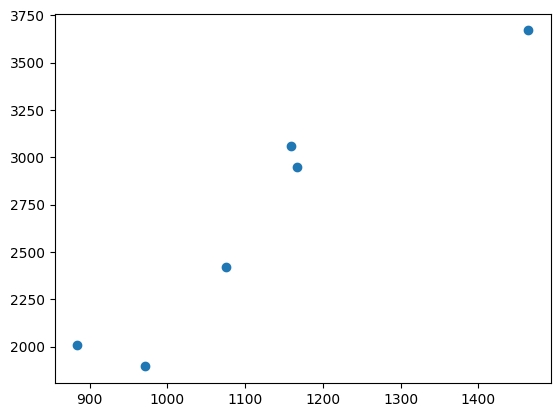

In [51]:
##assumptions

plt.scatter(Y_test,y_pred)

In [52]:
residuals=Y_test-y_pred
print(residuals)

    index_price
8  -1902.636939
16  -923.867466
0  -2205.212231
18 -1122.706302
11 -1347.332785
9  -1782.798103


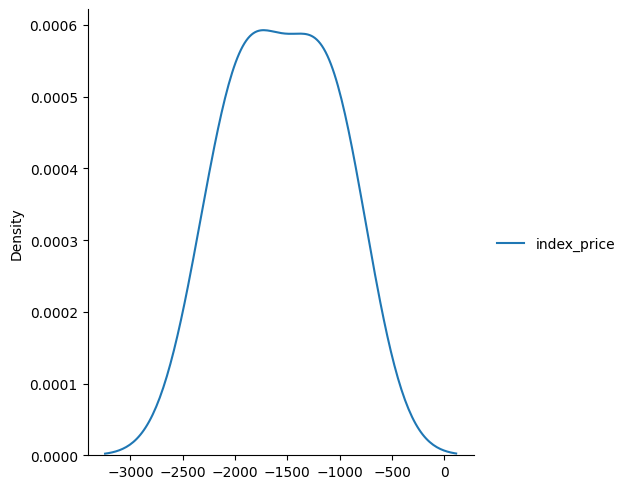

In [55]:
## plot this residuals
sns.displot(residuals,kind='kde')

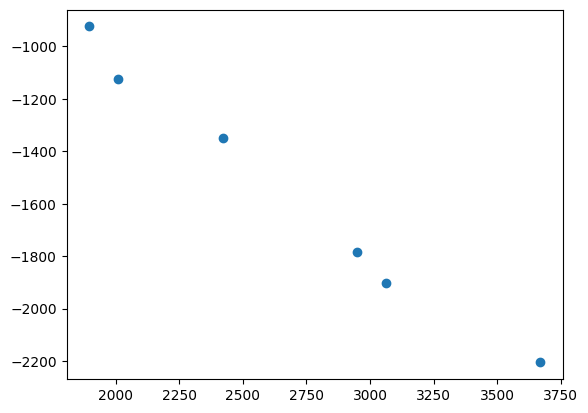

In [56]:
##scatter plot wrt predictions and residuals
plt.scatter(y_pred,residuals)

In [57]:
###ols
import statsmodels.api as sum

In [58]:
model=sum.OLS(Y_train,X_train).fit()


In [61]:
prediction=model.predict(X_test)
print(prediction)

[ 344.56970299 -540.55509616 1197.78920309 -534.17403635 -101.18322649
  338.18864318]


In [63]:
model.summary()

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              1468.
Date:                Thu, 17 Apr 2025   Prob (F-statistic):                    7.46e-19
Time:                        10:28:18   Log-Likelihood:                         -104.21
No. Observations:                  18   AIC:                                      212.4
Df Residuals:                      16   BIC:                                      214.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
interest_rate       569.9494     44.349     12.851      0.000     475.933     663.965
unemployment_rate   -20.5734     15.966     -1.289      0.216     -54.421      13.274
==============================================================================
Omnibus:                        1.657   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.437   Jarque-Bera (JB):                1.346
Skew:                          -0.611   Prob(JB):                        0.510
Kurtosis:                       2.451   Cond. No.                         14.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
print(regression.coef_)

[[ 260.33709119 -360.58377051]]
